In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import scipy

In [2]:
_VIDEO_PATH = 'D:\\data\\dehaze\\traffic'

In [11]:
video_name = 'dcp_0.90.avi'

cap = cv2.VideoCapture(os.path.join(_VIDEO_PATH,video_name))

list_frames = []
while(cap.isOpened()):
    _, frame = cap.read()
    list_frames.append(frame)
    if len(list_frames) == 3:
        cap.release()

In [12]:
# plt.imshow(list_frames[0])

In [13]:
# frame_prev = cv2.cvtColor(list_frames[0], cv2.COLOR_BGR2GRAY)
# frame_curr = cv2.cvtColor(list_frames[1], cv2.COLOR_BGR2GRAY)
# frame_next = cv2.cvtColor(list_frames[2], cv2.COLOR_BGR2GRAY)

In [14]:
# flow_1 = cv2.calcOpticalFlowFarneback(frame_prev, frame_curr, 
#                                     None, pyr_scale = 0.5, 
#                                     levels = 5, winsize = 11, 
#                                     iterations = 5, poly_n = 5, 
#                                     poly_sigma = 1.1, flags = 0)

# flow_2 = cv2.calcOpticalFlowFarneback(frame_curr, frame_next, 
#                                     None, pyr_scale = 0.5, 
#                                     levels = 5, winsize = 11, 
#                                     iterations = 5, poly_n = 5, 
#                                     poly_sigma = 1.1, flags = 0)

In [15]:
def cal_dense_optical_flow(frame_1, frame_2):
    mask = np.zeros_like(frame_1)
    frame_1 = cv2.cvtColor(frame_1, cv2.COLOR_BGR2GRAY)
    mask[..., 1] = 255
    frame_2 = cv2.cvtColor(frame_2, cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(frame_1, frame_2, 
                                    None, pyr_scale = 0.5, 
                                    levels = 5, winsize = 11, 
                                    iterations = 5, poly_n = 5, 
                                    poly_sigma = 1.1, flags = 0)

    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    mask[..., 0] = angle * 180 / np.pi / 2
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
    
    return bgr

In [16]:
flow_1 = cal_dense_optical_flow(list_frames[0], list_frames[1])
flow_2 = cal_dense_optical_flow(list_frames[1], list_frames[2])

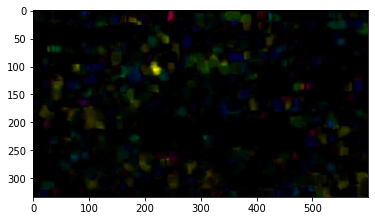

In [17]:
plt.imshow(flow_1)

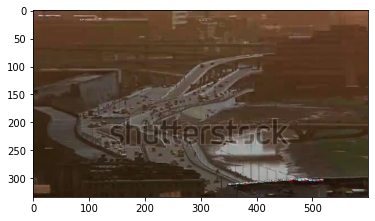

In [18]:
plt.imshow(list_frames[1])

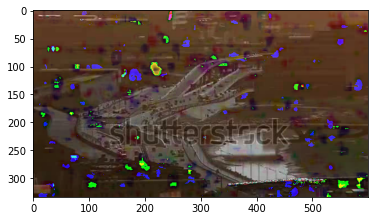

In [19]:
diff_prev_flow = np.subtract(list_frames[0], flow_1)
plt.imshow(diff_prev_flow)

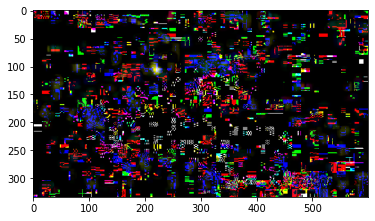

In [20]:
fw_error = np.subtract(list_frames[1], diff_prev_flow)
plt.imshow(fw_error)

In [70]:
np.max(fw_error), np.min(fw_error)

(255, 0)

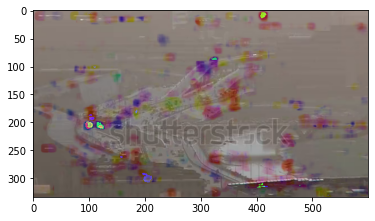

In [45]:
plt.imshow(np.abs(np.subtract(list_frames[1], flow_2)))

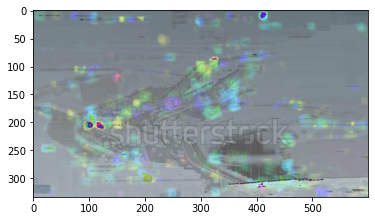

In [46]:
plt.imshow(np.abs(np.subtract(flow_2, list_frames[1])))

In [52]:
list_frames[1]

array([[[147, 134, 130],
        [147, 134, 130],
        [147, 134, 130],
        ...,
        [159, 145, 138],
        [159, 145, 138],
        [159, 145, 138]],

       [[147, 134, 130],
        [147, 134, 130],
        [147, 134, 130],
        ...,
        [159, 145, 138],
        [159, 145, 138],
        [159, 145, 138]],

       [[147, 134, 130],
        [147, 134, 130],
        [147, 134, 130],
        ...,
        [159, 145, 138],
        [159, 145, 138],
        [159, 145, 138]],

       ...,

       [[ 94,  81,  70],
        [ 94,  81,  70],
        [ 94,  81,  70],
        ...,
        [ 89,  80,  77],
        [ 89,  80,  77],
        [ 89,  80,  77]],

       [[ 94,  81,  70],
        [ 94,  81,  70],
        [ 94,  81,  70],
        ...,
        [ 96,  87,  84],
        [ 96,  87,  84],
        [ 96,  87,  84]],

       [[ 94,  81,  70],
        [ 94,  81,  70],
        [ 94,  81,  70],
        ...,
        [ 98,  89,  86],
        [ 98,  89,  86],
        [ 98,  89,  86]]

In [53]:
flow_1

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 0],
        [0, 0, 1],
        [0, 0, 0]],

       [[0, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [1, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [50]:
np.subtract(list_frames[1], flow_1)

array([[[147, 134, 130],
        [147, 134, 130],
        [147, 134, 130],
        ...,
        [159, 145, 138],
        [159, 145, 138],
        [159, 145, 138]],

       [[147, 134, 130],
        [147, 134, 130],
        [147, 134, 130],
        ...,
        [159, 145, 138],
        [159, 145, 138],
        [159, 145, 138]],

       [[147, 134, 130],
        [147, 134, 130],
        [147, 134, 130],
        ...,
        [159, 145, 138],
        [159, 145, 138],
        [159, 145, 138]],

       ...,

       [[ 94,  81,  70],
        [ 94,  81,  70],
        [ 94,  81,  70],
        ...,
        [ 88,  79,  77],
        [ 89,  80,  76],
        [ 89,  80,  77]],

       [[ 94,  81,  70],
        [ 93,  81,  70],
        [ 93,  81,  70],
        ...,
        [ 96,  87,  84],
        [ 96,  87,  84],
        [ 96,  87,  84]],

       [[ 94,  81,  70],
        [ 94,  81,  70],
        [ 93,  81,  70],
        ...,
        [ 98,  89,  86],
        [ 98,  89,  86],
        [ 98,  89,  86]]

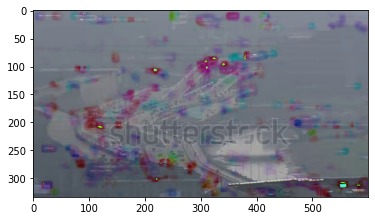

In [54]:
fw_error = np.subtract(list_frames[1], flow_1)
plt.imshow(cv2.cvtColor(fw_error, cv2.COLOR_BGR2RGB))